### EXAMPLE 1: Deterministic Kuramoto-Sivashinsky 
In this example we show how one runs the deterministic KS equation. 

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from ipywidgets import interact
from ml_collections import ConfigDict
from models.ETD_KT_CM_JAX_Vectorised import *
from filters import resamplers
from filters.filter import ParticleFilter
from jax import config
config.update("jax_enable_x64", True)

We specify the initial condition associated with the Kassam-Trefethen run of KS equation, by loading the dictionary.

In [2]:
signal_params = ConfigDict(KS_params)
print(signal_params)

Advection_basis_name: none
E: 1
Forcing_basis_name: none
P: 0
S: 0
c_0: 0
c_1: 1
c_2: 1
c_3: 0.0
c_4: 1
dt: 0.25
equation_name: Kuramoto-Sivashinsky
initial_condition: Kassam_Trefethen_KS_IC
method: Dealiased_ETDRK4
noise_magnitude: 0.0
nx: 256
tmax: 150.0
xmax: 100.53096491487338
xmin: 0.0



Now we specify the model refered to as a signal model, by instantiating the class, and then specify the initial condition. 

In [3]:
signal_model = ETD_KT_CM_JAX_Vectorised(signal_params)
initial_signal = initial_condition(signal_model.x, signal_params.E, signal_params.initial_condition)
print(initial_signal.shape)

I0000 00:00:1744361507.213767       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


(1, 256)


To run the model outputting all timesteps we run the signal model, with nmax timesteps.

In [4]:
final, all = signal_model.run(initial_signal, signal_model.nmax, None)

This results in a (nt, E, nx) sized array, number of timesteps, number of ensemble members, number of spatial points.

In [5]:
print(all.shape) # particles
print(all[0].shape) # particles
print(all[1].shape) # signal

(600, 1, 256)
(1, 256)
(1, 256)


Here we insert the initial condition into the outputted solution. 

In [6]:
print(initial_signal.shape)
print(all.shape)
signal = jnp.concatenate([initial_signal[None,...], all], axis=0)


(1, 256)
(600, 1, 256)


We plot an interactive plot

In [ ]:
def plot(time_index):
    plt.plot(signal_model.x, signal[time_index,0,:], color='k')
    plt.legend(['signal'])
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title(f'time = {time_index*signal_model.params.dt}')
    plt.show()

interact(plot, time_index=(0, signal_model.nmax))

interactive(children=(IntSlider(value=300, description='time_index', max=600), Output()), _dom_classes=('widge…

<function __main__.plot(time_index)>

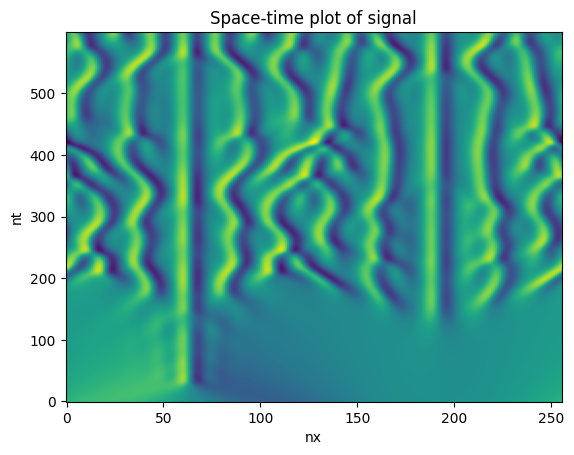

In [8]:
plt.title('Space-time plot of signal')
plt.imshow(all[:,0,:],aspect='auto',origin='lower')
plt.xlabel('nx')
plt.ylabel('nt')
plt.show()
